# Artificial Neural Networks

In [1]:
# Required modules

import pandas as pd
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

In [2]:
# Loading the data

data = pd.read_csv('cocomo81.csv')
data.head()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,0.88,1.16,0.70,1.0,1.06,1.15,1.07,1.19,1.13,1.17,1.1,1.00,1.24,1.10,1.04,113.0,2040.0
1,0.88,1.16,0.85,1.0,1.06,1.00,1.07,1.00,0.91,1.00,0.9,0.95,1.10,1.00,1.00,293.0,1600.0
2,1.00,1.16,0.85,1.0,1.00,0.87,0.94,0.86,0.82,0.86,0.9,0.95,0.91,0.91,1.00,132.0,243.0
3,0.75,1.16,0.70,1.0,1.00,0.87,1.00,1.19,0.91,1.42,1.0,0.95,1.24,1.00,1.04,60.0,240.0
4,0.88,0.94,1.00,1.0,1.00,0.87,1.00,1.00,1.00,0.86,0.9,0.95,1.24,1.00,1.00,16.0,33.0


In [3]:
# Inspecting data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rely    63 non-null     float64
 1   data    63 non-null     float64
 2   cplx    63 non-null     float64
 3   time    63 non-null     float64
 4   stor    63 non-null     float64
 5   virt    63 non-null     float64
 6   turn    63 non-null     float64
 7   acap    63 non-null     float64
 8   aexp    63 non-null     float64
 9   pcap    63 non-null     float64
 10  vexp    63 non-null     float64
 11  lexp    63 non-null     float64
 12  modp    63 non-null     float64
 13  tool    63 non-null     float64
 14  sced    63 non-null     float64
 15  loc     63 non-null     float64
 16  actual  63 non-null     float64
dtypes: float64(17)
memory usage: 8.5 KB


,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
count,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.036349,1.003968,1.091429,1.113810,1.14381,1.008413,0.971746,0.905238,0.948571,0.93746,1.005238,1.001429,1.004127,1.016984,1.048889,77.209841,683.320635
std,0.193477,0.073431,0.202563,0.161639,0.17942,0.120593,0.080973,0.151507,0.119243,0.16651,0.093375,0.051988,0.130935,0.085735,0.075586,168.509374,1821.582348
min,0.750000,0.940000,0.700000,1.000000,1.00000,0.870000,0.870000,0.710000,0.820000,0.70000,0.900000,0.950000,0.820000,0.830000,1.000000,1.980000,5.900000
25%,0.880000,0.940000,1.000000,1.000000,1.00000,0.870000,0.870000,0.860000,0.820000,0.86000,0.900000,0.950000,0.910000,1.000000,1.000000,8.650000,40.500000
50%,1.000000,1.000000,1.070000,1.060000,1.06000,1.000000,1.000000,0.860000,1.000000,0.86000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,98.000000
75%,1.150000,1.040000,1.300000,1.110000,1.21000,1.150000,1.000000,1.000000,1.000000,1.00000,1.100000,1.000000,1.100000,1.100000,1.080000,60.000000,438.000000
max,1.400000,1.160000,1.650000,1.660000,1.56000,1.300000,1.150000,1.460000,1.290000,1.42000,1.210000,1.140000,1.240000,1.240000,1.230000,1150.000000,11400.000000


<Axes: >

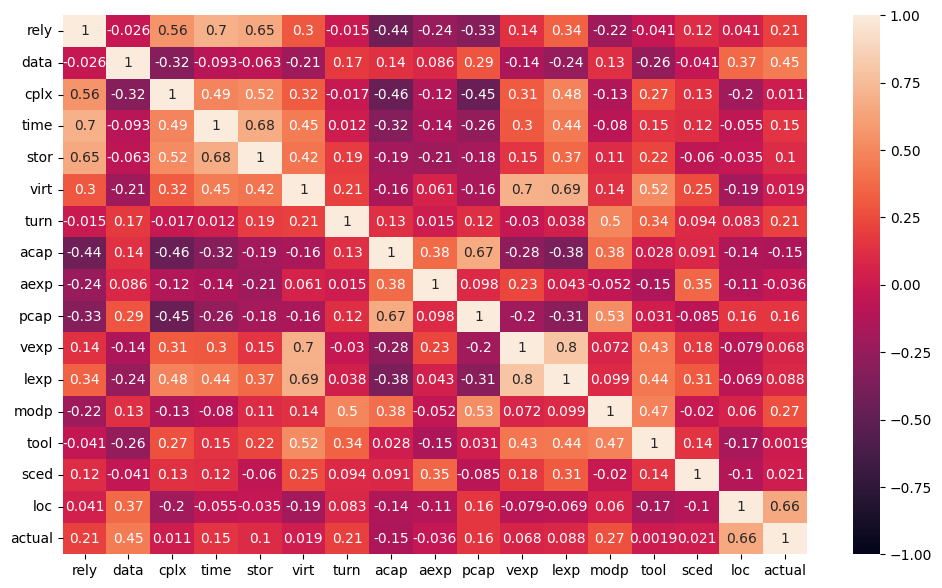

In [4]:
# Correlation matrix

sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

In [5]:
# Separating into features and labels

X = data.loc[:, data.columns != 'actual']
y = data[['actual']]

In [6]:
# Scaling the data

# scaling the features
scale_feature = MinMaxScaler()
scale_feature.fit(X)
scaled_X = scale_feature.transform(X)

# scaling the labels
scale_labels = MinMaxScaler()
scale_labels.fit(y)
scaled_y = scale_labels.transform(y)

In [7]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.20, random_state=88)

In [8]:
# Defining a model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(23, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Running the model
epochs = 20

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - loss: 0.0265 - val_loss: 0.1085
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0212 - val_loss: 0.0970
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0172 - val_loss: 0.0886
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0156 - val_loss: 0.0837
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0149 - val_loss: 0.0806
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0144 - val_loss: 0.0788
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0138 - val_loss: 0.0779
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - val_loss: 0.0780
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0087 - val_loss: 0.0784
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0086 - val_loss: 0.0791
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0099 - val_loss: 0.0799
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0093 - val_loss: 0.0810


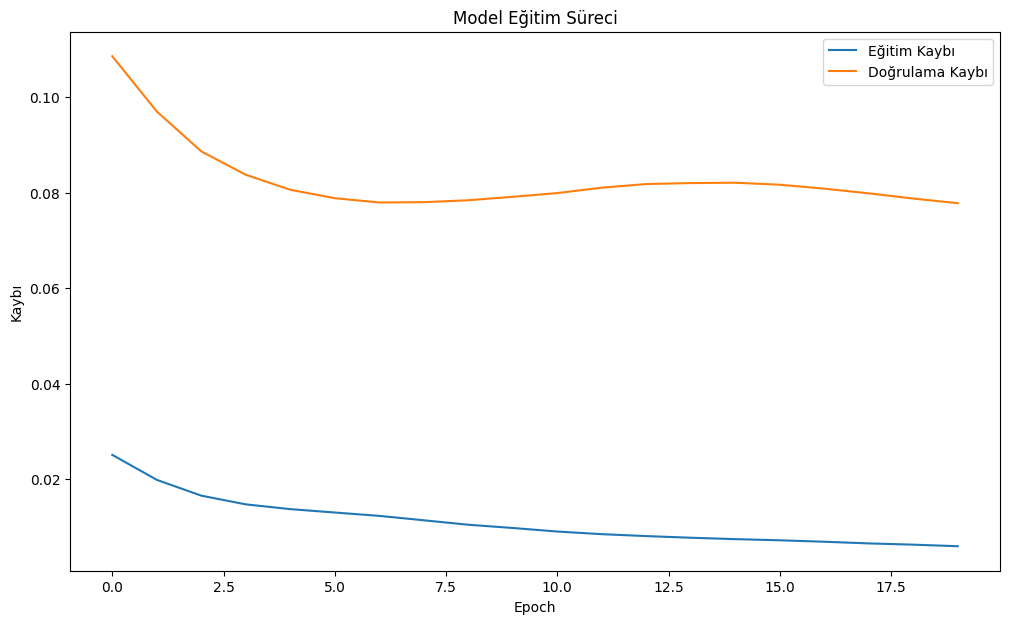

In [14]:
# Eğitim sürecinin görselleştirilmesi
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Eğitim Süreci')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

In [11]:
# Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 23)                  │             391 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,063 (8.06 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,376 (5.38 KB)

In [13]:
import numpy as np
# Test verisi ile tahmin yapma
y_pred = model.predict(X_test)

# MMRE Hesaplama
mmre = np.mean(np.abs((y_test - y_pred.flatten()) / y_test))
print("Test verisi MMRE:", mmre)
# Modeli kaydetme
model.save('model1.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Test verisi MMRE: 66.51039090575046


# Tüm modeller

In [ ]:
# Separating into features and labels

X = data.loc[:, data.columns != 'actual']
y = data[['actual']]
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.20, random_state=88)

In [ ]:

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR modelini eğitme
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Tahmin yapma
y_pred_svr = svr_model.predict(X_test_scaled)

# Hata hesaplama
svr_mse = mean_squared_error(y_test, y_pred_svr)
print(f'SVR Model MSE: {svr_mse}')
